# 🪄 yolo/prediction

In [1]:
from bluer_options import string
from bluer_objects import storage
from bluer_objects import objects
from bluer_sandbox import notebooks

from bluer_algo.host import signature
from bluer_algo.yolo.model.predictor import YoloPredictor
from bluer_algo.yolo.dataset.classes import YoloDataset
from bluer_algo import env
from bluer_algo.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🪄  bluer_algo-4.388.1.bluer_ai-12.259.1.bluer_objects-6.258.1.bluer_options-5.164.1.torch-2.2.2.Python 3.12.9.Darwin 23.6.0..Jupyter-Notebook,
built on 15 September 2025, 13:34:30


In [2]:
verbose = True
line_width: int = 80

In [3]:
prediction_object_name = objects.unique_object("yolo-prediction")

🌀  📂 yolo-prediction-2025-09-15-13-34-30-ygah3k


---

In [4]:
dataset_object_name = env.BLUER_ALGO_COCO128_TEST_DATASET
# assert storage.download(dataset_object_name)

In [5]:
dataset = YoloDataset(object_name=dataset_object_name)
assert dataset.valid

🪄  found 128 image(s).
🪄  found 128 label(s).
🪄  missing 2 image(s): 000000000508, 000000000250
🪄  missing 2 label(s): 000000000659, 000000000656
🪄  YoloDataset, 126 record(s),  80 class(es): person, bicycle, car, motorcycle, airplane, ...


---

In [6]:
model_object_name = env.BLUER_ALGO_COCO128_TEST_MODEL
# assert storage.download(model_object_name)

In [7]:
success, predictor = YoloPredictor.load(object_name=model_object_name)
assert success

🪄  loading YoloPredictor from coco128-model-2025-09-15-3m0mmj/best ...
🪄  YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (b

---

In [8]:
record_id = dataset.list_of_records[0]

success, image = dataset.load_image(
    record_id=record_id,
    verbose=verbose,
    )
assert success

🌀  loaded 480x640x3:uint8 from /Users/kamangir/storage/abcli/coco128-2025-09-14-q6oxj4/coco128/images/train2017/000000000612.jpg


In [9]:
success, detections = predictor.predict(
    image=image,
    header=objects.signature(
                        record_id,
                        object_name=dataset_object_name,
                    ),
    verbose=verbose,
    prediction_object_name=prediction_object_name,
    record_id=record_id,
)

/Users/kamangir/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0: 480x640 1 person, 145.2ms
Speed: 3.0ms preprocess, 145.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
🪄  took 1 second(s)
🪄  1 detection(s): 1 x person
🌀  bluer_objects.metadata.post.post[/Users/kamangir/storage/abcli/yolo-prediction-2025-09-15-13-34-30-ygah3k/metadata.yaml]: 000000000612
🌀  bluer_objects.file.save.save_yaml: 000000000612 -> /Users/kamangir/storage/abcli/yolo-prediction-2025-09-15-13-34-30-ygah3k/metadata.yaml.
🌀  bluer_objects.file.save.save_image: 566x640x3:uint8 -> /Users/kamangir/storage/abcli/yolo-prediction-2025-09-15-13-34-30-ygah3k/000000000612.png


""

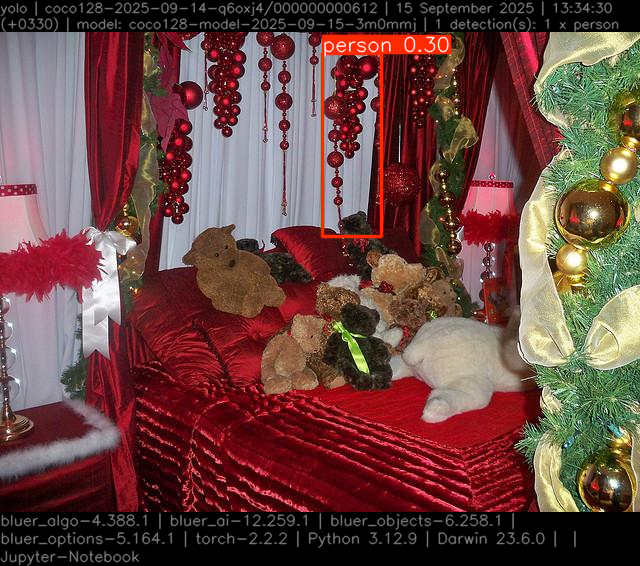

In [10]:
notebooks.imshow(objects.path_of(
    object_name=prediction_object_name,
    filename=f"{record_id}.png"
))

---

In [11]:
assert notebooks.upload(prediction_object_name)

100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
🌀  ⏺️  yolo-prediction-2025-09-15-13-34-30-ygah3k | 00001
🌀  ⬆️  /Users/kamangir/storage/abcli/yolo-prediction-2025-09-15-13-34-30-ygah3k/000000000612.png
🌀  ⬆️  /Users/kamangir/storage/abcli/yolo-prediction-2025-09-15-13-34-30-ygah3k/metadata.yaml
🌀  ⏹️  yolo-prediction-2025-09-15-13-34-30-ygah3k


In [12]:
# END